<a href="https://colab.research.google.com/github/neonunicorngh/IEEE-Conference/blob/main/IEEE_Con.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload 11 CSV files (1.csv ... 11.csv):


Saving 1.csv to 1.csv
Saving 2.csv to 2.csv
Saving 3.csv to 3.csv
Saving 4.csv to 4.csv
Saving 5.csv to 5.csv
Saving 6.csv to 6.csv
Saving 7.csv to 7.csv
Saving 8.csv to 8.csv
Saving 9.csv to 9.csv
Saving 10.csv to 10.csv
Saving 11.csv to 11.csv
Loaded: ['1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv', '11.csv']

Reading 1.csv → V2O5=0.5 wt%, Temp=950°C
  Clean rows: 42

Reading 2.csv → V2O5=0.75 wt%, Temp=950°C
  Clean rows: 37

Reading 3.csv → V2O5=1.5 wt%, Temp=950°C
  Clean rows: 42

Reading 4.csv → V2O5=2.25 wt%, Temp=950°C
  Clean rows: 42

Reading 5.csv → V2O5=3.0 wt%, Temp=950°C
  Clean rows: 42

Reading 6.csv → V2O5=0.0 wt%, Temp=1050°C
  ⚠ Skipping unreliable sample

Reading 7.csv → V2O5=0.5 wt%, Temp=1050°C
  Clean rows: 29

Reading 8.csv → V2O5=0.75 wt%, Temp=1050°C
  Clean rows: 24

Reading 9.csv → V2O5=1.5 wt%, Temp=1050°C
  Clean rows: 41

Reading 10.csv → V2O5=2.25 wt%, Temp=1050°C
  Clean rows: 42

Reading 11.csv → V2O5=3.0 wt%

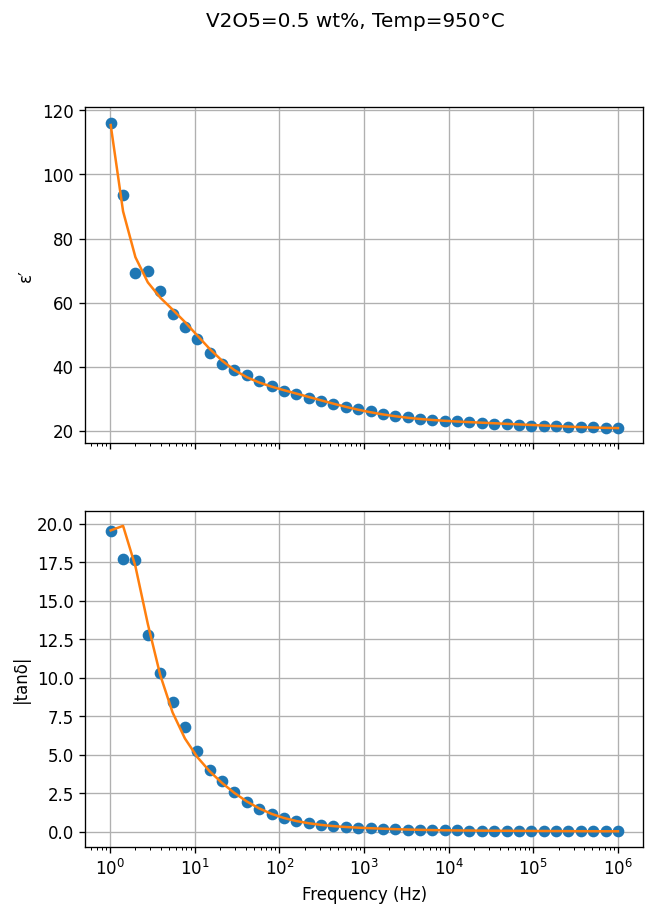

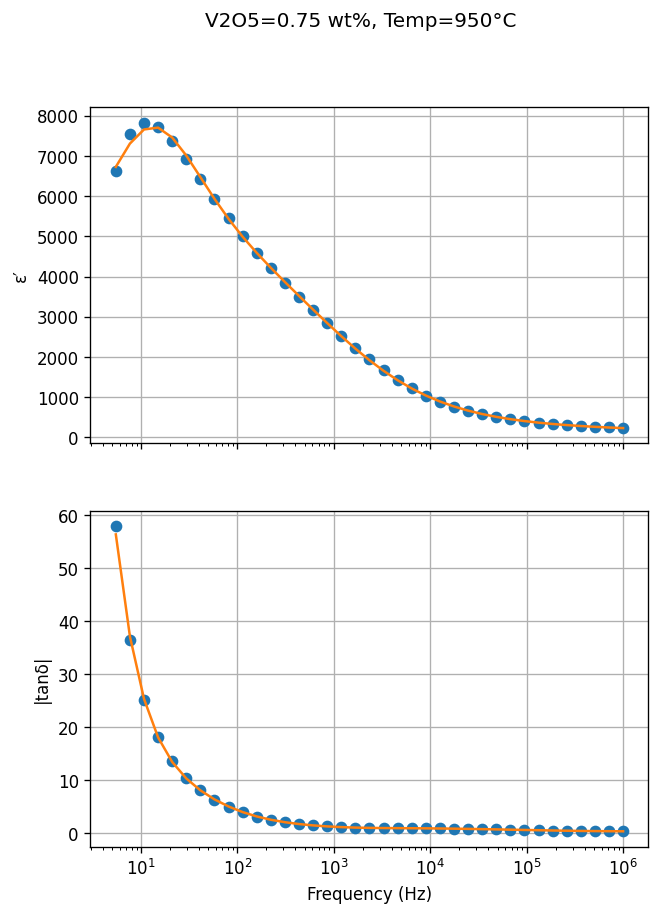

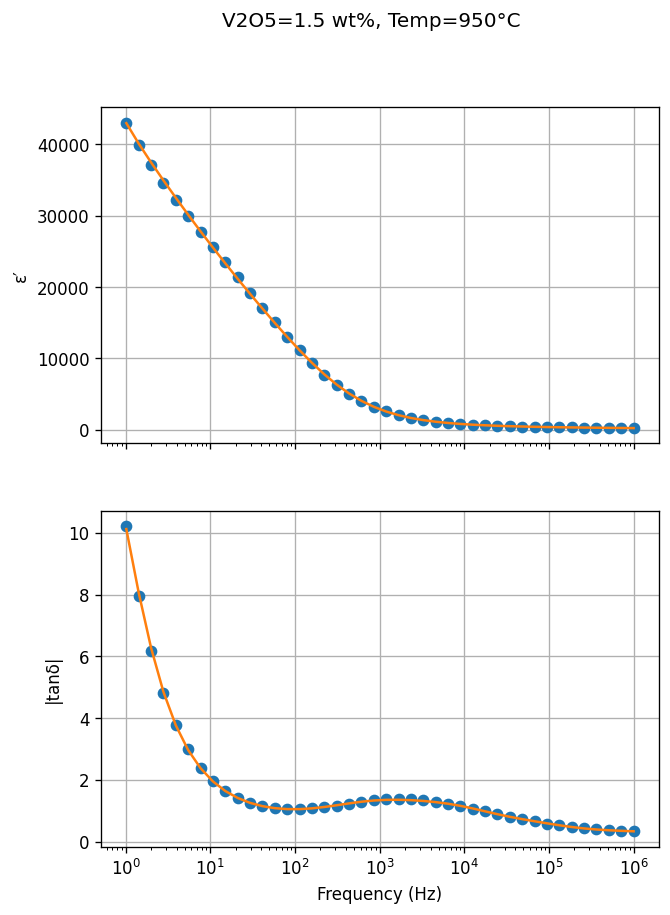

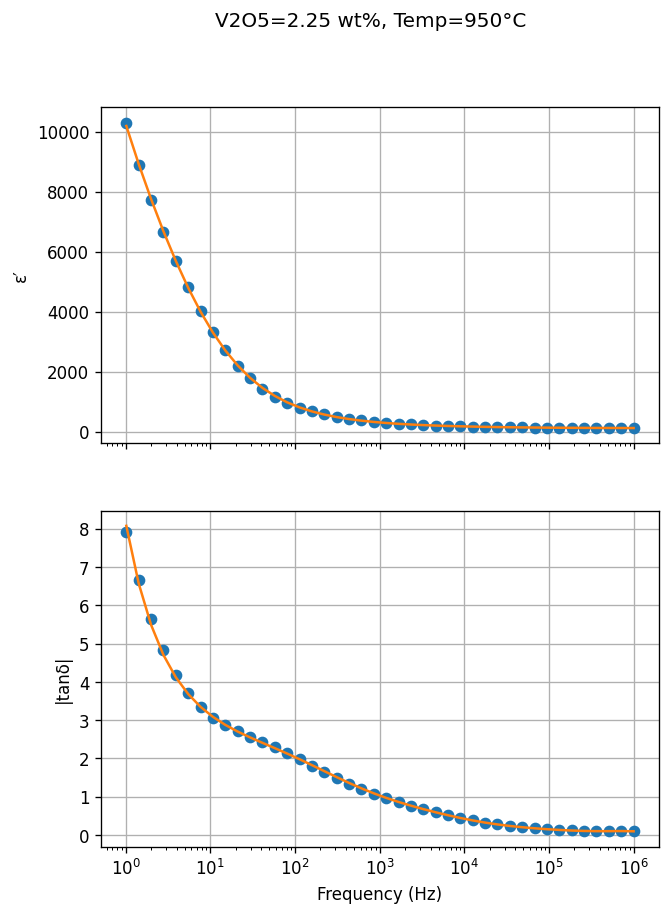

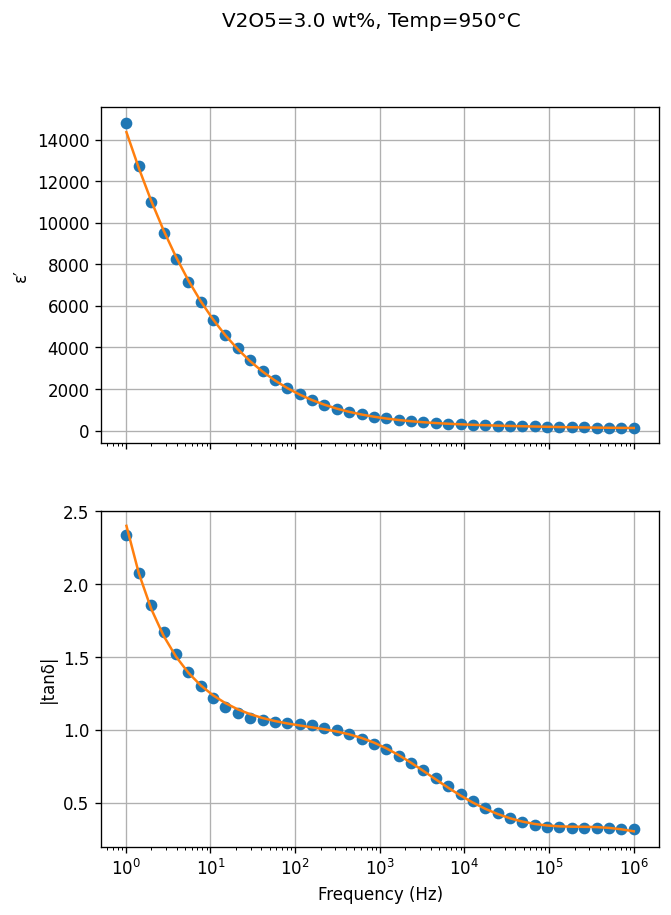

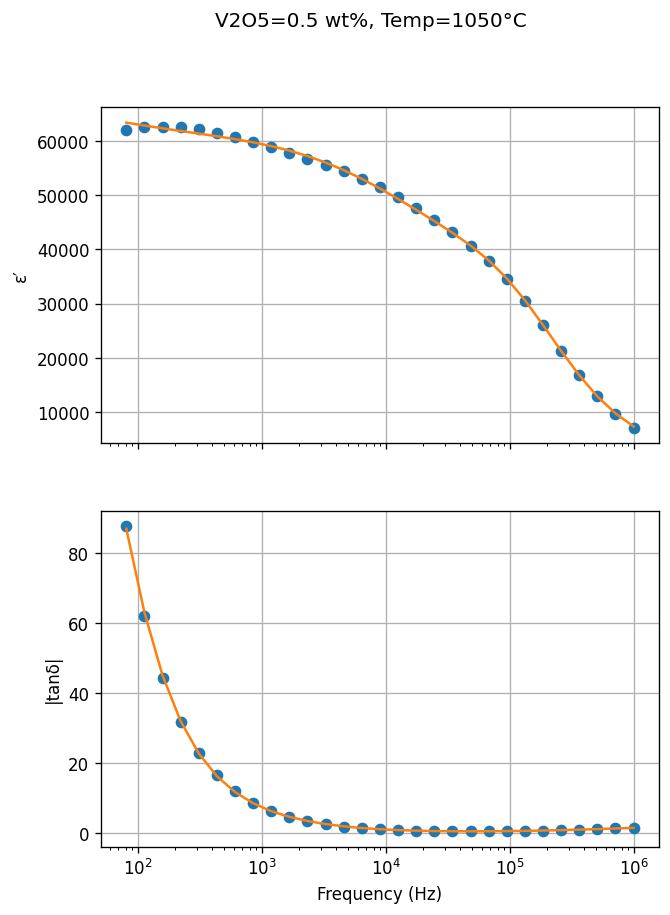

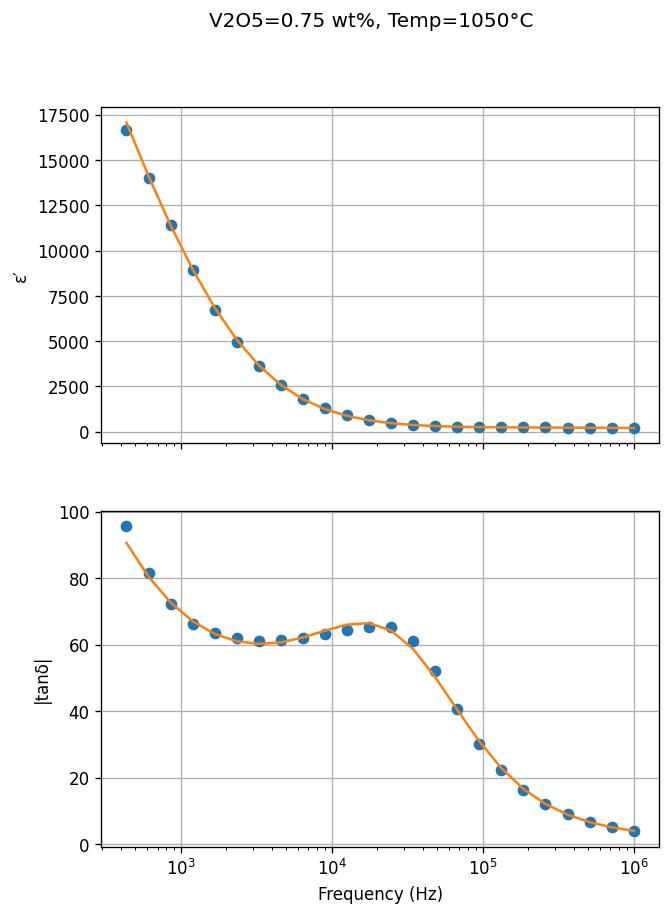

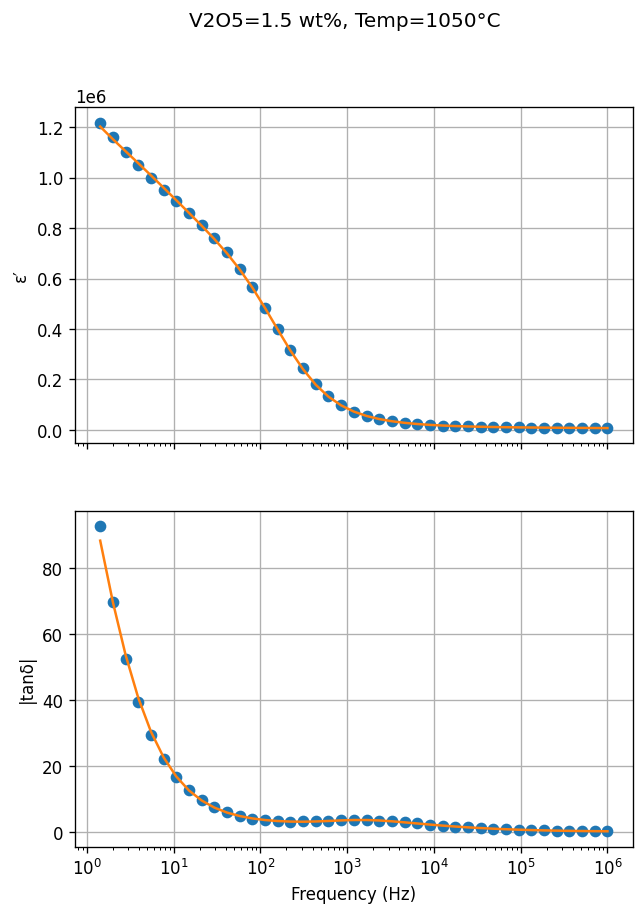

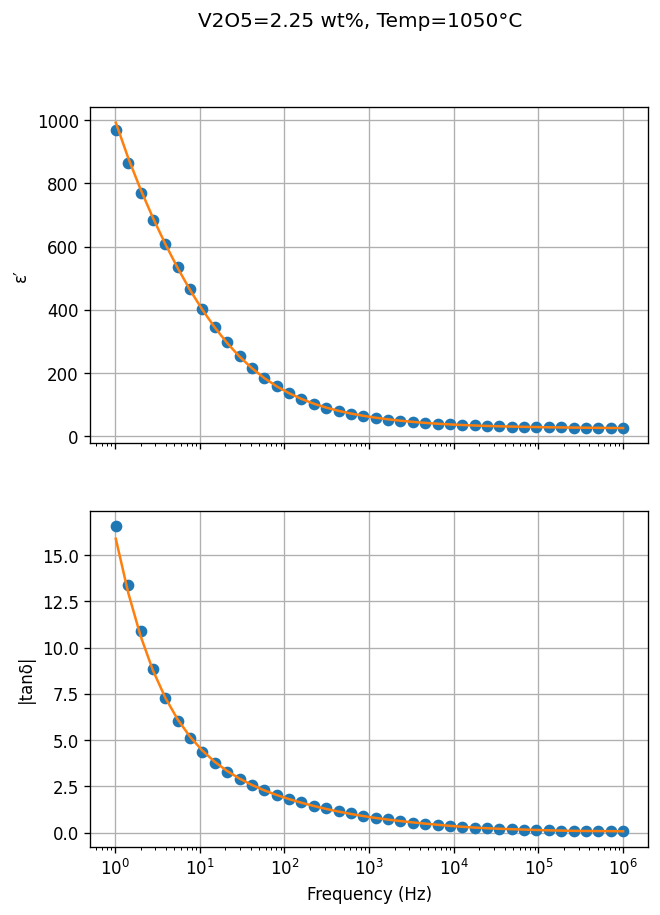

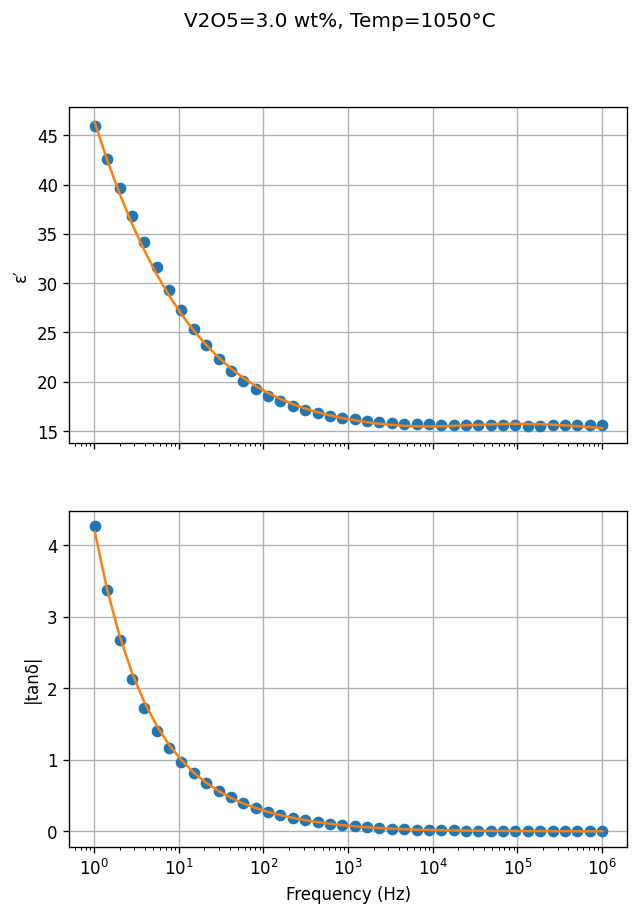


=== Optimal V2O5 at 1 kHz ===
Temp=950°C → Best V2O5 ≈ 1.061 wt%
Temp=1050°C → Best V2O5 ≈ 1.347 wt%

=== 3.b – Multiple random splits ===


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Seed=0 → R²_eps_test=0.999965, R²_tan_test=0.999661
Seed=1 → R²_eps_test=0.999579, R²_tan_test=0.984378
Seed=2 → R²_eps_test=0.999808, R²_tan_test=0.980444
Seed=3 → R²_eps_test=0.999900, R²_tan_test=0.927181
Seed=4 → R²_eps_test=0.999686, R²_tan_test=0.928362

Mean ± std over seeds:
ε′  test R²: 0.999788 ± 0.000140
|tanδ| test R²: 0.964005 ± 0.030276


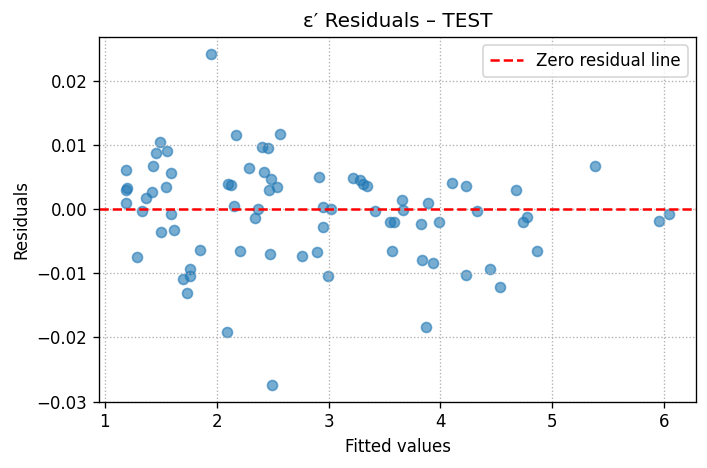

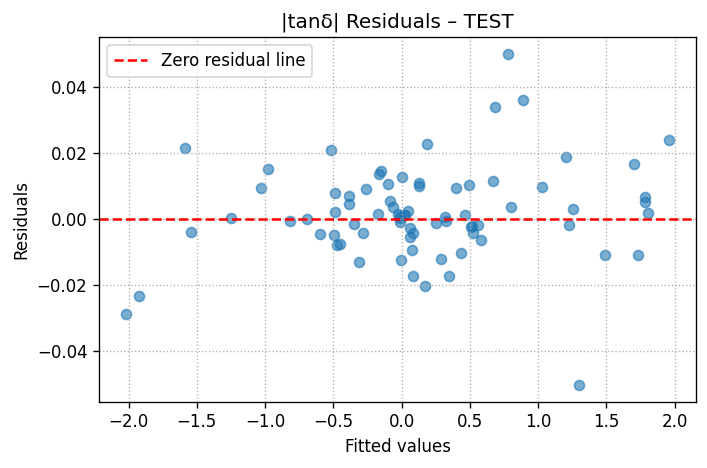

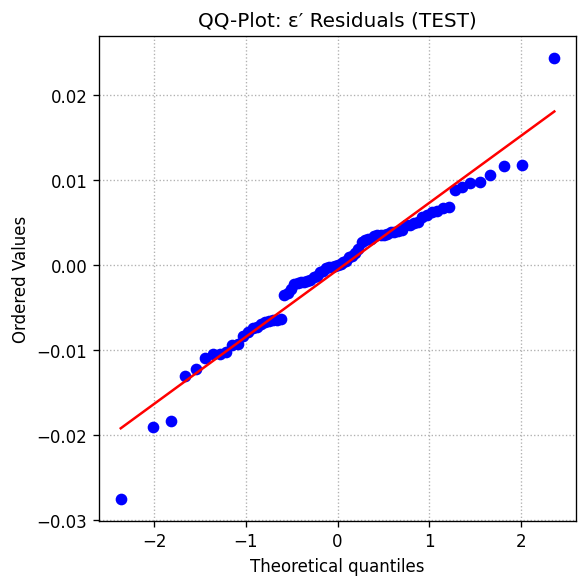

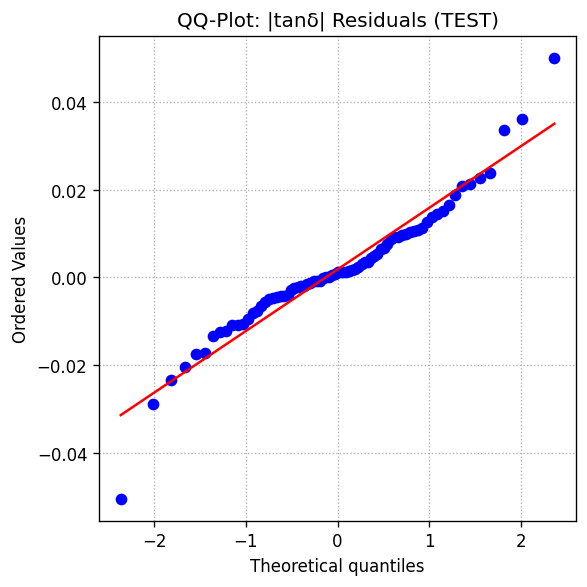


=== Optimal V2O5 at 100.0 Hz ===
Temp=950°C → Best V2O5 ≈ 1.257 wt%
Temp=1050°C → Best V2O5 ≈ 1.377 wt%

=== Optimal V2O5 at 1000.0 Hz ===
Temp=950°C → Best V2O5 ≈ 1.061 wt%
Temp=1050°C → Best V2O5 ≈ 1.347 wt%

=== Optimal V2O5 at 10000.0 Hz ===
Temp=950°C → Best V2O5 ≈ 1.016 wt%
Temp=1050°C → Best V2O5 ≈ 1.302 wt%

=== Optimal V2O5 at 100000.0 Hz ===
Temp=950°C → Best V2O5 ≈ 1.071 wt%
Temp=1050°C → Best V2O5 ≈ 1.322 wt%

=== Plotting Optimal V2O5 vs Frequency ===


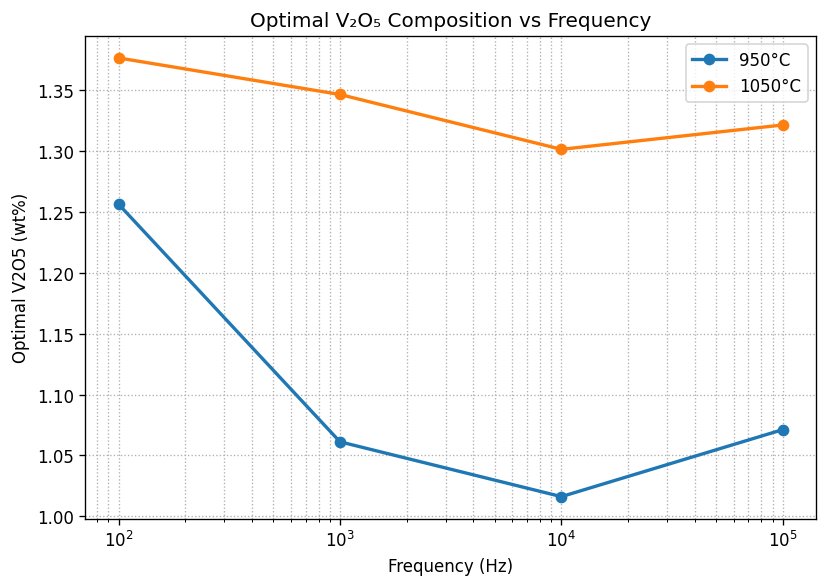

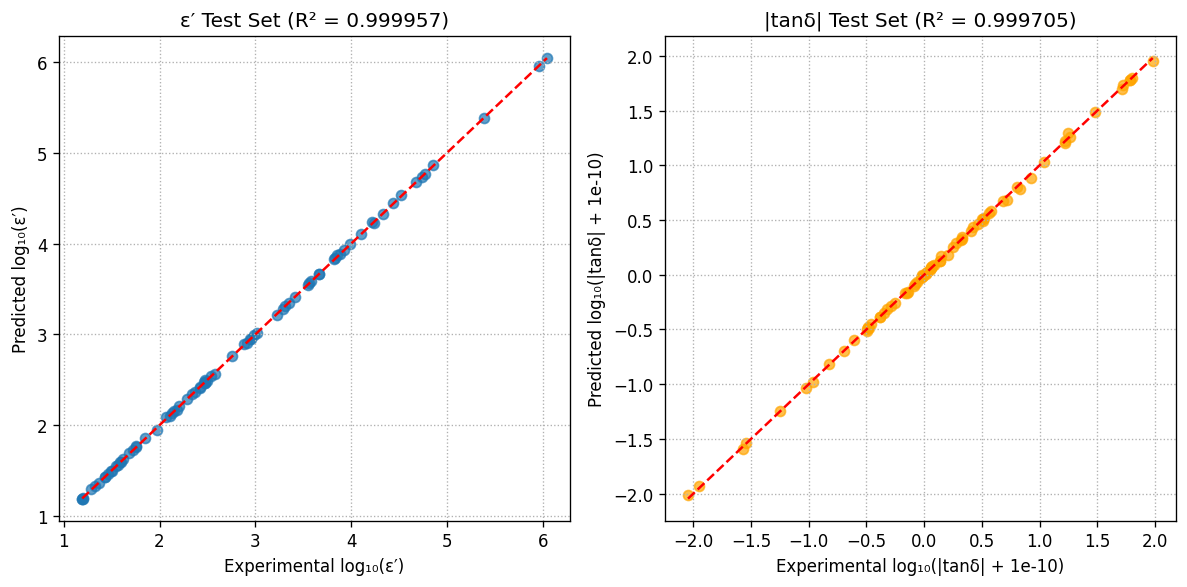

OPTIMAL V₂O₅ AT DIFFERENT TEMPERATURES (1 kHz)

Temperature = 987 °C   |   Frequency = 1,000 Hz
→ Optimal V₂O₅ = 1.073 wt%   (quality figure = 130295586.49)
------------------------------------------------------------
Temperature = 1000 °C   |   Frequency = 1,000 Hz
→ Optimal V₂O₅ = 1.157 wt%   (quality figure = 10247779.58)
------------------------------------------------------------
Temperature = 1023 °C   |   Frequency = 1,000 Hz
→ Optimal V₂O₅ = 1.218 wt%   (quality figure = 300975.49)
------------------------------------------------------------

Same temperatures but at 10 kHz:
Temperature = 987 °C   |   Frequency = 10,000 Hz
→ Optimal V₂O₅ = 1.059 wt%   (quality figure = 4862793.70)
------------------------------------------------------------
Temperature = 1000 °C   |   Frequency = 10,000 Hz
→ Optimal V₂O₅ = 1.199 wt%   (quality figure = 1060774.38)
------------------------------------------------------------
Temperature = 1023 °C   |   Frequency = 10,000 Hz
→ Optimal V₂O₅ = 1.18

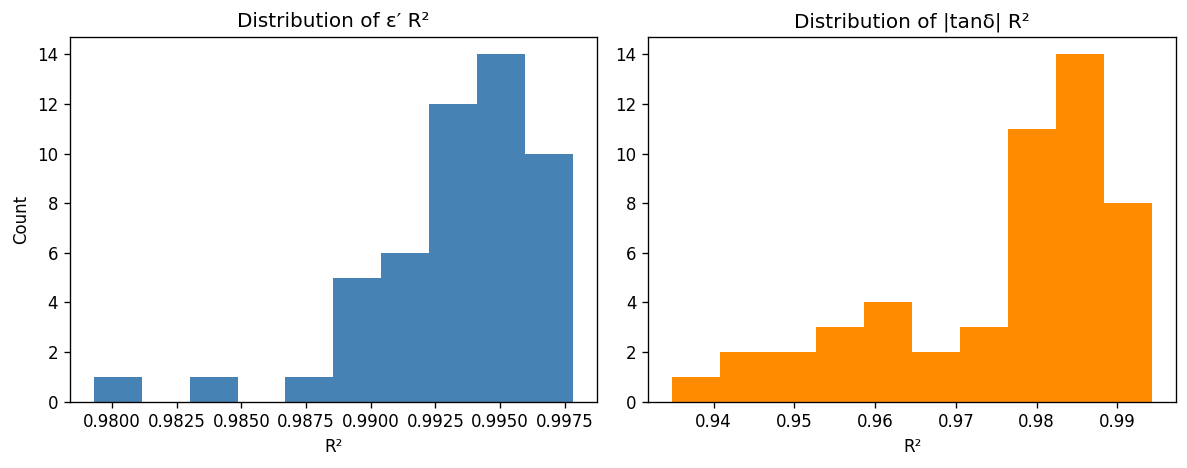

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files as colab_files
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor

plt.rcParams["figure.dpi"] = 120
print("Upload 11 CSV files (1.csv ... 11.csv):")
uploaded = colab_files.upload()

def numeric_key(name):
    import re
    m = re.search(r"(\d+)", name)
    return int(m.group(1)) if m else 0

csv_names = sorted(list(uploaded.keys()), key=numeric_key)
print("Loaded:", csv_names)

condition_map = {
    1:(0.50, 950),
    2:(0.75, 950),
    3:(1.50, 950),
    4:(2.25, 950),
    5:(3.00, 950),
    6:(0.00,1050),
    7:(0.50,1050),
    8:(0.75,1050),
    9:(1.50,1050),
    10:(2.25,1050),
    11:(3.00,1050),
}

per_condition = {}
all_rows = []
freq_col = None

for idx, fname in enumerate(csv_names, start=1):
    v2o5, temp = condition_map[idx]

    print(f"\nReading {fname} → V2O5={v2o5} wt%, Temp={temp}°C")
    if v2o5 == 0.0 and temp == 1050:
        print("  ⚠ Skipping unreliable sample")
        continue

    df = pd.read_csv(fname, encoding="latin1")
    df.columns = [c.replace("\ufeff", "").strip() for c in df.columns]

    if freq_col is None:
        freq_col = df.columns[0]

    df = df[df[freq_col] != 1].copy()
    df["V2O5"] = float(v2o5)
    df["Temp"] = float(temp)

    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

    mask = (
        df[freq_col].notna() &
        df["Eps'"].notna() &
        df["Tan(Delta)"].notna() &
        (df["Eps'"] > 0) & (df["Eps'"] < 1e7) &
        (df["Tan(Delta)"].abs() < 100)
    )
    clean = df[mask].copy()
    clean.sort_values(freq_col, inplace=True)

    print("  Clean rows:", len(clean))
    per_condition[(v2o5, temp)] = clean
    all_rows.append(clean)

all_data = pd.concat(all_rows, ignore_index=True)
print("\nCleaned data shape:", all_data.shape)
tiny = 1e-10
X_list = []
eps_list = []
tan_list = []

for (v2o5, temp), df in per_condition.items():
    f = df[freq_col].values
    eps = df["Eps'"].values
    tand = np.abs(df["Tan(Delta)"].values)

    ok = np.isfinite(f) & np.isfinite(eps) & (eps > 0)
    f, eps, tand = f[ok], eps[ok], tand[ok]

    logf = np.log10(f)
    logeps = np.log10(eps)
    logtan = np.log10(tand + tiny)
    temp_norm = (temp - 1000)/100.0

    for fi, ye, yt in zip(logf, logeps, logtan):
        X_list.append([fi, float(v2o5), temp_norm])
        eps_list.append(ye)
        tan_list.append(yt)

X = np.array(X_list)
y_eps = np.array(eps_list)
y_tan = np.array(tan_list)

print("\nDataset shapes → X:", X.shape)
X_train, X_test, y_eps_train, y_eps_test, y_tan_train, y_tan_test = \
    train_test_split(X, y_eps, y_tan, test_size=0.20, random_state=0)

NN_eps = MLPRegressor(
    hidden_layer_sizes=(32,16),
    activation='tanh',
    solver='lbfgs',
    alpha=1e-3,
    max_iter=8000,
    random_state=0,
)

NN_tan = MLPRegressor(
    hidden_layer_sizes=(32,16),
    activation='tanh',
    solver='lbfgs',
    alpha=1e-3,
    max_iter=8000,
    random_state=1,
)

NN_eps.fit(X_train, y_eps_train)
NN_tan.fit(X_train, y_tan_train)

print("\n=== R² Scores ===")
print("ε′   train:", r2_score(y_eps_train, NN_eps.predict(X_train)))
print("ε′   test :", r2_score(y_eps_test,  NN_eps.predict(X_test)))
print("|tanδ| train:", r2_score(y_tan_train, NN_tan.predict(X_train)))
print("|tanδ| test :", r2_score(y_tan_test,  NN_tan.predict(X_test)))

def predict_eps_tan(f_array, v2o5, temp):
    f_array = np.asarray(f_array, float)
    logf = np.log10(f_array)
    temp_norm = (temp - 1000)/100.0

    Xp = np.column_stack([logf,
                          np.full_like(logf, float(v2o5)),
                          np.full_like(logf, temp_norm)])

    eps = 10**NN_eps.predict(Xp)
    tan = 10**NN_tan.predict(Xp)
    return eps, tan

for (v2o5, temp), df in per_condition.items():
    f, eps_exp, tan_exp = df[freq_col], df["Eps'"], np.abs(df["Tan(Delta)"])
    eps_ml, tan_ml = predict_eps_tan(f, v2o5, temp)

    fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
    fig.suptitle(f"V2O5={v2o5} wt%, Temp={temp}°C")

    ax[0].semilogx(f, eps_exp, "o")
    ax[0].semilogx(f, eps_ml, "-")
    ax[0].set_ylabel("ε′")
    ax[0].grid(True)

    ax[1].semilogx(f, tan_exp, "o")
    ax[1].semilogx(f, tan_ml, "-")
    ax[1].set_ylabel("|tanδ|")
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].grid(True)
    plt.show()

print("\n=== Optimal V2O5 at 1 kHz ===")

f_target = 1e3
temps_sorted = sorted({t for (_, t) in per_condition.keys()})
v_min = min(v for (v, _) in per_condition.keys())
v_max = max(v for (v, _) in per_condition.keys())

for temp in temps_sorted:
    V_grid = np.linspace(v_min, v_max, 500)
    P_vals = []

    for v in V_grid:
        eps, tand = predict_eps_tan([f_target], v, temp)
        P_vals.append(eps[0]/tand[0])

    V_best = V_grid[np.argmax(P_vals)]
    print(f"Temp={temp}°C → Best V2O5 ≈ {V_best:.3f} wt%")

print("\n=== 3.b – Multiple random splits ===")

seeds = [0,1,2,3,4]
eps_scores, tan_scores = [], []

for seed in seeds:

    X_tr, X_te, eps_tr, eps_te, tan_tr, tan_te = train_test_split(
        X, y_eps, y_tan, test_size=0.20, random_state=seed
    )

    nn1 = MLPRegressor(
        hidden_layer_sizes=(32,16),
        activation='tanh',
        solver='lbfgs',
        alpha=1e-3,
        max_iter=4000,
        random_state=seed,
    )

    nn2 = MLPRegressor(
        hidden_layer_sizes=(32,16),
        activation='tanh',
        solver='lbfgs',
        alpha=1e-3,
        max_iter=4000,
        random_state=seed+50,
    )

    nn1.fit(X_tr, eps_tr)
    nn2.fit(X_tr, tan_tr)

    eps_scores.append(r2_score(eps_te, nn1.predict(X_te)))
    tan_scores.append(r2_score(tan_te, nn2.predict(X_te)))

for seed, r2e, r2t in zip(seeds, eps_scores, tan_scores):
    print(f"Seed={seed} → R²_eps_test={r2e:.6f}, R²_tan_test={r2t:.6f}")

print("\nMean ± std over seeds:")
print(f"ε′  test R²: {np.mean(eps_scores):.6f} ± {np.std(eps_scores):.6f}")
print(f"|tanδ| test R²: {np.mean(tan_scores):.6f} ± {np.std(tan_scores):.6f}")

def plot_test_residuals(y_true, y_pred, title):
    res = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, res, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', label="Zero residual line")
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title(title)
    plt.grid(True, ls=":")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_test_residuals(y_eps_test, NN_eps.predict(X_test), "ε′ Residuals – TEST")
plot_test_residuals(y_tan_test, NN_tan.predict(X_test), "|tanδ| Residuals – TEST")

def qq_plot(residuals, title):
    plt.figure(figsize=(5,5))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.grid(True, ls=":")
    plt.title(title)
    plt.tight_layout()
    plt.show()

eps_res_test = y_eps_test - NN_eps.predict(X_test)
tan_res_test = y_tan_test - NN_tan.predict(X_test)

qq_plot(eps_res_test, "QQ-Plot: ε′ Residuals (TEST)")
qq_plot(tan_res_test, "QQ-Plot: |tanδ| Residuals (TEST)")
freq_list = [1e2, 1e3, 1e4, 1e5]   # 100 Hz, 1 kHz, 10 kHz, 100 kHz
#  all optimum
for f_target in freq_list:
    print(f"\n=== Optimal V2O5 at {f_target} Hz ===")
    for temp in temps_sorted:
        V_grid = np.linspace(v_min, v_max, 500)
        P_vals = []
        for v in V_grid:
            eps, tand = predict_eps_tan([f_target], v, temp)
            P_vals.append(eps[0] / tand[0])
        V_best = V_grid[np.argmax(P_vals)]
        print(f"Temp={temp}°C → Best V2O5 ≈ {V_best:.3f} wt%")
print("\n=== Plotting Optimal V2O5 vs Frequency ===")

freq_list = np.array([1e2, 1e3, 1e4, 1e5])  # 100 Hz, 1 kHz, 10 kHz, 100 kHz

opt_v_950 = []
opt_v_1050 = []

for f_target in freq_list:

    V_grid = np.linspace(v_min, v_max, 500)
    P_vals = []
    for v in V_grid:
        eps, tand = predict_eps_tan([f_target], v, 950)
        P_vals.append(eps[0] / tand[0])
    opt_v_950.append(V_grid[np.argmax(P_vals)])

    P_vals = []
    for v in V_grid:
        eps, tand = predict_eps_tan([f_target], v, 1050)
        P_vals.append(eps[0] / tand[0])
    opt_v_1050.append(V_grid[np.argmax(P_vals)])

plt.figure(figsize=(7,5))

plt.plot(freq_list, opt_v_950, "-o", label="950°C", linewidth=2)
plt.plot(freq_list, opt_v_1050, "-o", label="1050°C", linewidth=2)

plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Optimal V2O5 (wt%)")
plt.title("Optimal V₂O₅ Composition vs Frequency")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

y_eps_pred_test = NN_eps.predict(X_test)
y_tan_pred_test = NN_tan.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(y_eps_test, y_eps_pred_test, alpha=0.7)
ax[0].plot([y_eps_test.min(), y_eps_test.max()], [y_eps_test.min(), y_eps_test.max()], 'r--')
ax[0].set_xlabel("Experimental log₁₀(ε′)")
ax[0].set_ylabel("Predicted log₁₀(ε′)")
ax[0].set_title(f"ε′ Test Set (R² = {r2_score(y_eps_test, y_eps_pred_test):.6f})")
ax[0].grid(True, ls=":")

ax[1].scatter(y_tan_test, y_tan_pred_test, alpha=0.7, color='orange')
ax[1].plot([y_tan_test.min(), y_tan_test.max()], [y_tan_test.min(), y_tan_test.max()], 'r--')
ax[1].set_xlabel("Experimental log₁₀(|tanδ| + 1e-10)")
ax[1].set_ylabel("Predicted log₁₀(|tanδ| + 1e-10)")
ax[1].set_title(f"|tanδ| Test Set (R² = {r2_score(y_tan_test, y_tan_pred_test):.6f})")
ax[1].grid(True, ls=":")

plt.tight_layout()
plt.show()
# BEST V2O5 FOR ANY TEMPERATURE I WANT (even never measured!)
def best_v2o5_at_temperature(temp_celsius, frequency_hz=1000):
    """
    Give me any temperature (e.g. 987, 1000, 1023 °C) and any frequency,
    I will tell you the optimal V2O5 wt% that gives the highest ε′/tanδ.
    """
    V_grid = np.linspace(0.4, 3.2, 600)
    quality = []

    for v in V_grid:
        eps, tan = predict_eps_tan([frequency_hz], v, temp_celsius)
        quality.append(eps[0] / tan[0])

    best_v = V_grid[np.argmax(quality)]
    best_quality = np.max(quality)

    print(f"Temperature = {temp_celsius} °C   |   Frequency = {frequency_hz:,} Hz")
    print(f"→ Optimal V₂O₅ = {best_v:.3f} wt%   (quality figure = {best_quality:.2f})")
    print("-" * 60)
    return best_v
print("OPTIMAL V₂O₅ AT DIFFERENT TEMPERATURES (1 kHz)\n")
best_v2o5_at_temperature(987,   frequency_hz=1000)
best_v2o5_at_temperature(1000,  frequency_hz=1000)
best_v2o5_at_temperature(1023,  frequency_hz=1000)

#  also at 10 kHz
print("\nSame temperatures but at 10 kHz:")
best_v2o5_at_temperature(987,   10000)
best_v2o5_at_temperature(1000,  10000)
best_v2o5_at_temperature(1023,  10000)
#  CONFIDENCE INTERVALS VIA REPEATED TRAINING
from sklearn.utils import shuffle

N_RUNS = 50  # number of repeated randomized trials
r2_eps_list = []
r2_tan_list = []

for run in range(N_RUNS):
    # Randomize dataset each run
    X_shuf, y_eps_shuf, y_tan_shuf = shuffle(X, y_eps, y_tan, random_state=run)
    X_train, X_test, y_eps_train, y_eps_test, y_tan_train, y_tan_test = \
        train_test_split(X_shuf, y_eps_shuf, y_tan_shuf, test_size=0.20, random_state=run)

      RF_eps_run = RandomForestRegressor(
        n_estimators=500, min_samples_leaf=2, random_state=run
    )
    RF_tan_run = RandomForestRegressor(
        n_estimators=500, min_samples_leaf=2, random_state=run
    )

    RF_eps_run.fit(X_train, y_eps_train)
    RF_tan_run.fit(X_train, y_tan_train)

    eps_pred = RF_eps_run.predict(X_test)
    tan_pred = RF_tan_run.predict(X_test)

    r2_eps_list.append(r2_score(y_eps_test, eps_pred))
    r2_tan_list.append(r2_score(y_tan_test, tan_pred))

r2_eps_arr = np.array(r2_eps_list)
r2_tan_arr = np.array(r2_tan_list)

# Compute statistics
def summarize(arr, name):
    mean = np.mean(arr)
    std  = np.std(arr)
    ci95_low  = mean - 1.96 * std / np.sqrt(N_RUNS)
    ci95_high = mean + 1.96 * std / np.sqrt(N_RUNS)
    print(f"\n{name} R²:")
    print(f"  Mean     = {mean:.4f}")
    print(f"  Std dev  = {std:.4f}")
    print(f"  95% CI   = [{ci95_low:.4f}, {ci95_high:.4f}]")

summarize(r2_eps_arr, "ε′")
summarize(r2_tan_arr, "|tanδ|")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(r2_eps_arr, bins=10, color="steelblue")
plt.title("Distribution of ε′ R²")
plt.xlabel("R²"); plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(r2_tan_arr, bins=10, color="darkorange")
plt.title("Distribution of |tanδ| R²")
plt.xlabel("R²")

plt.tight_layout()
plt.show()


Upload 11 CSV files (1.csv ... 11.csv):


Saving 1.csv to 1 (1).csv
Saving 2.csv to 2 (1).csv
Saving 3.csv to 3 (1).csv
Saving 4.csv to 4 (1).csv
Saving 5.csv to 5 (1).csv
Saving 6.csv to 6 (1).csv
Saving 7.csv to 7 (1).csv
Saving 8.csv to 8 (1).csv
Saving 9.csv to 9 (1).csv
Saving 10.csv to 10 (1).csv
Saving 11.csv to 11 (1).csv
Loaded: ['1 (1).csv', '2 (1).csv', '3 (1).csv', '4 (1).csv', '5 (1).csv', '6 (1).csv', '7 (1).csv', '8 (1).csv', '9 (1).csv', '10 (1).csv', '11 (1).csv']
=== 950°C ===


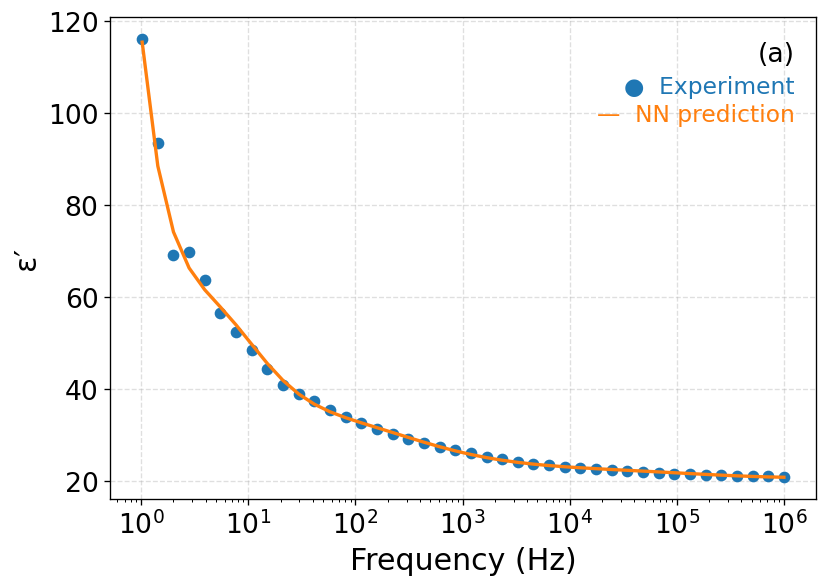

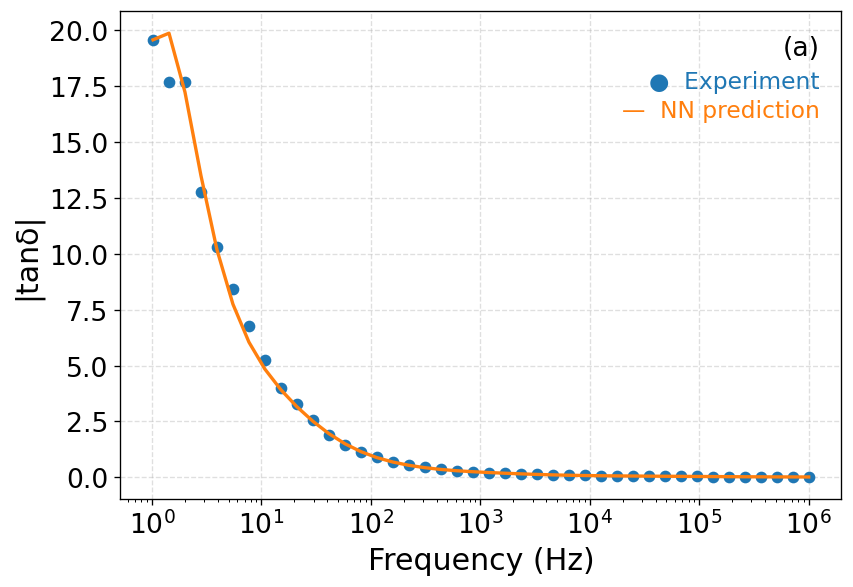

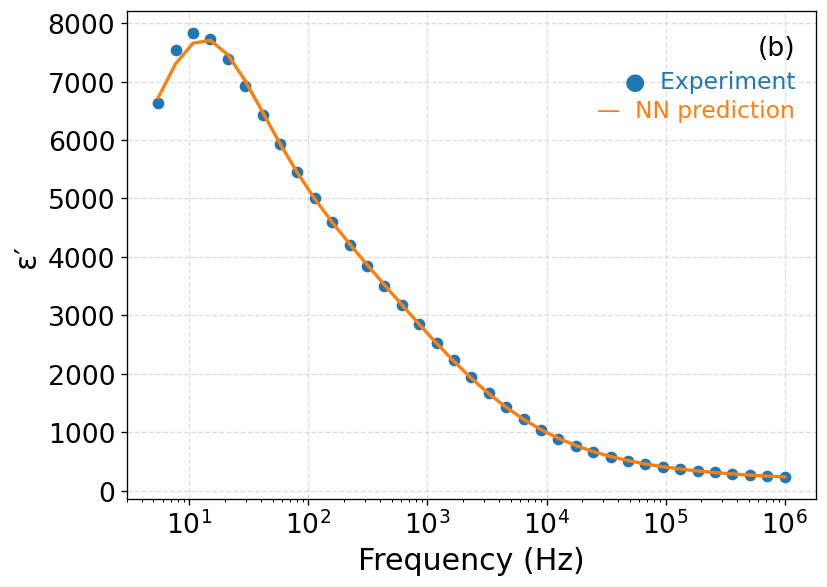

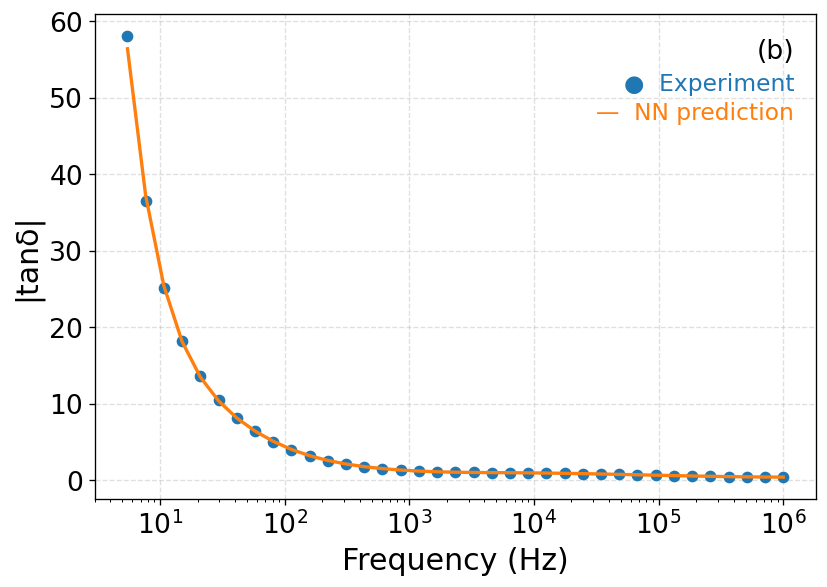

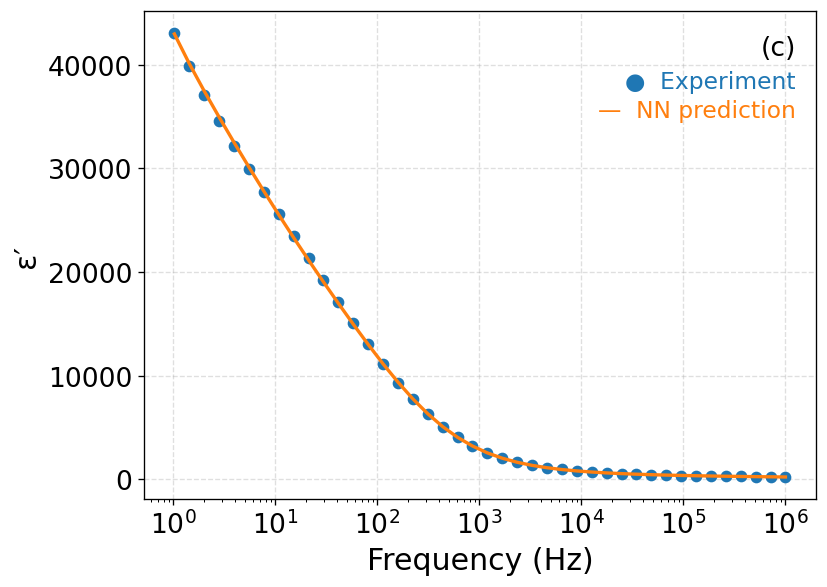

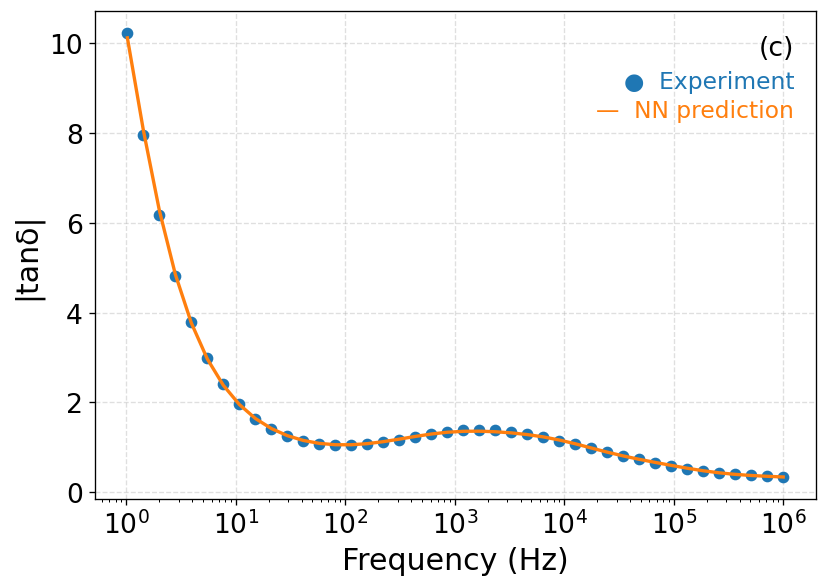

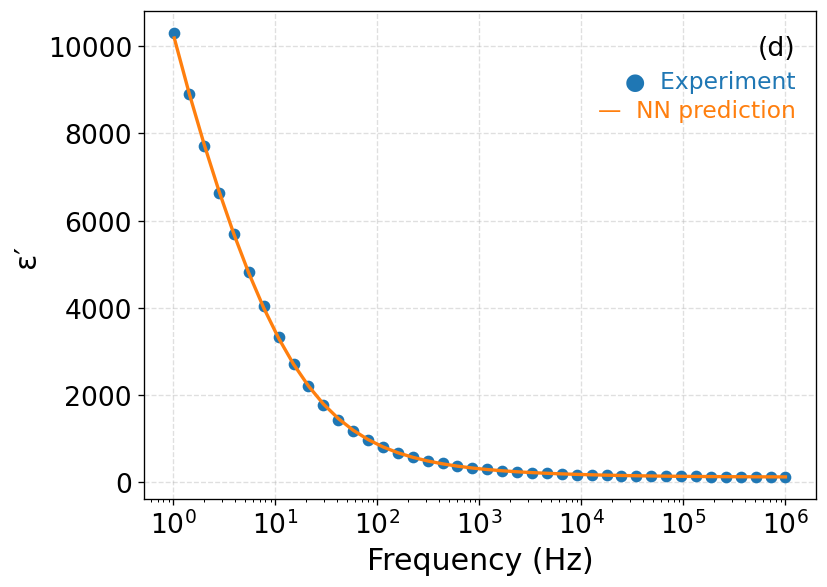

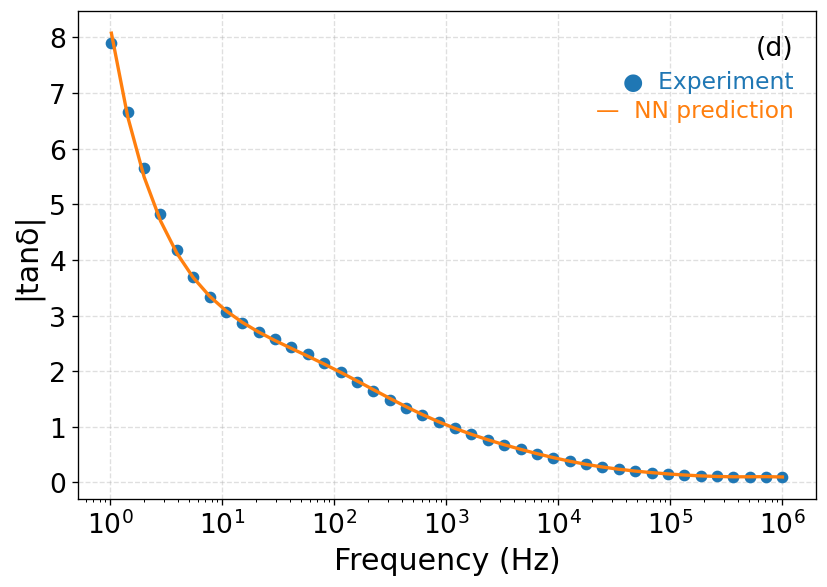

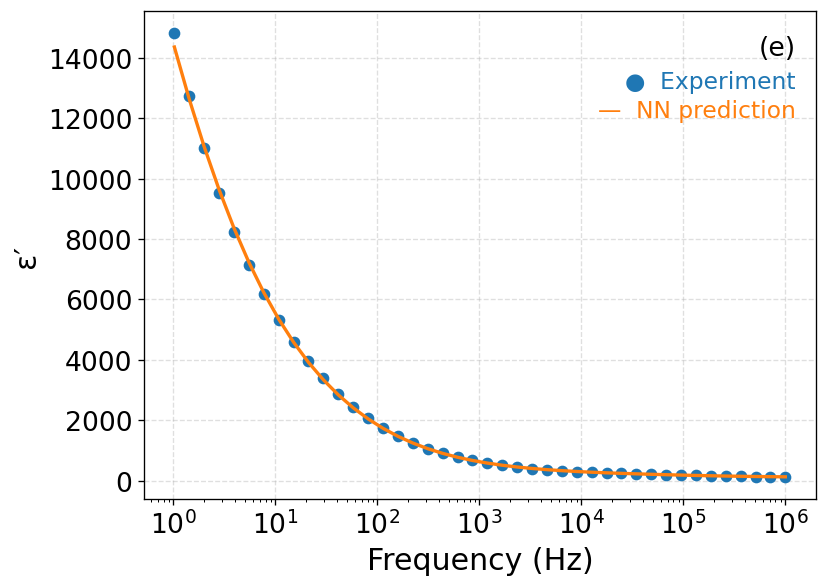

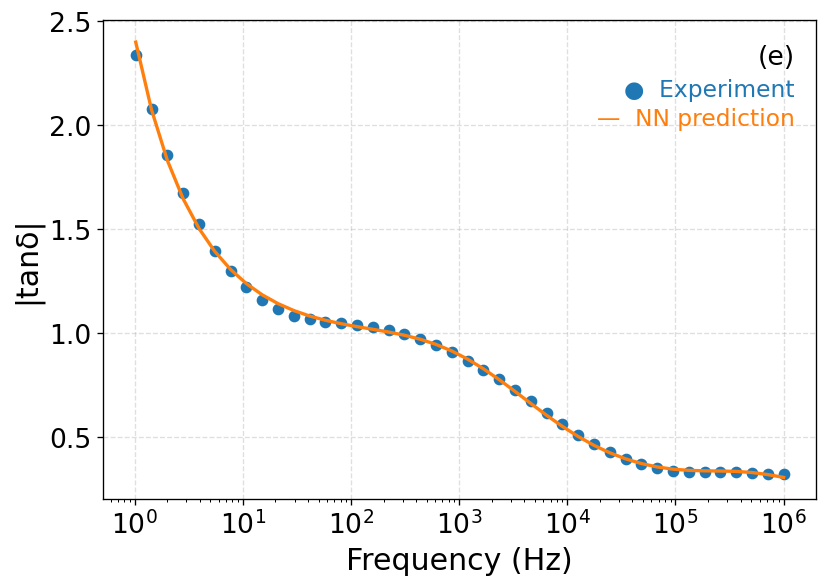

=== 1050°C ===


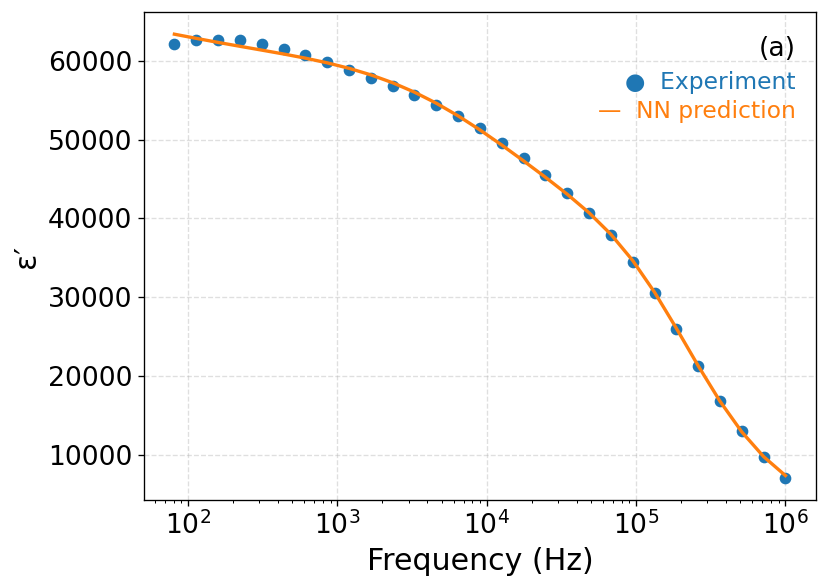

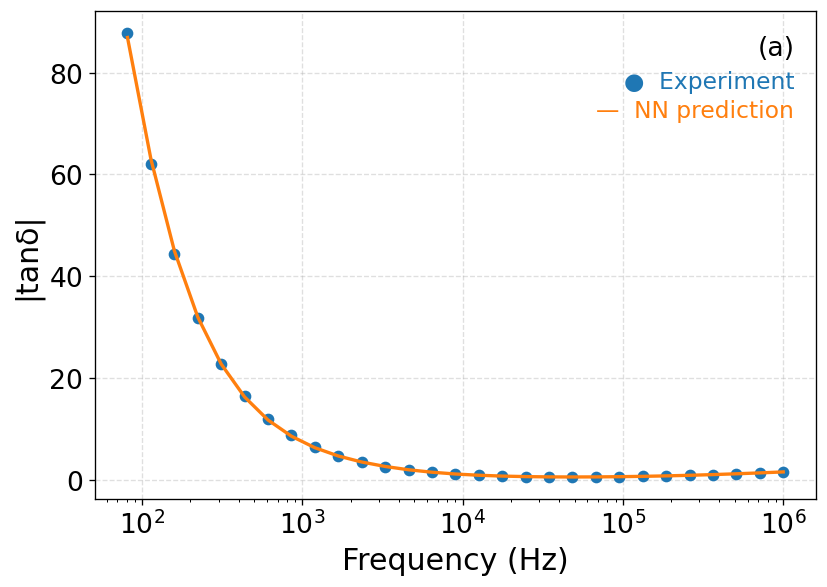

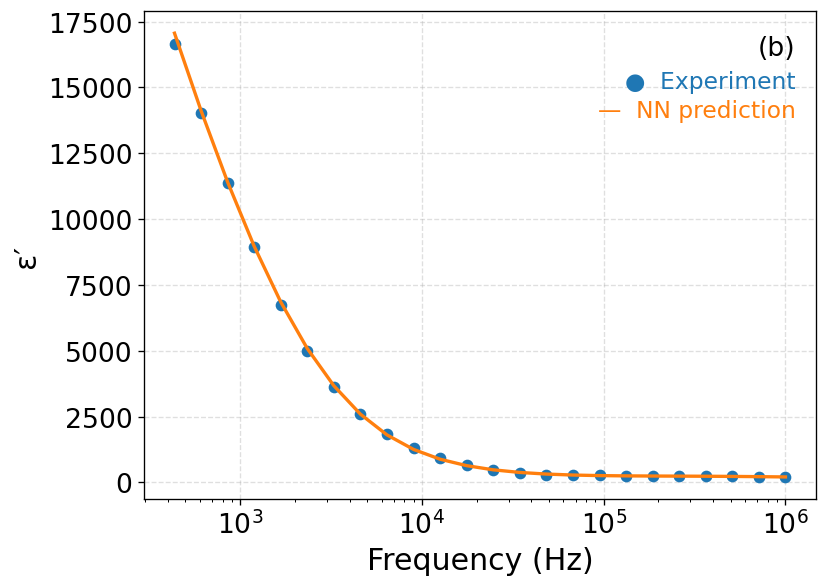

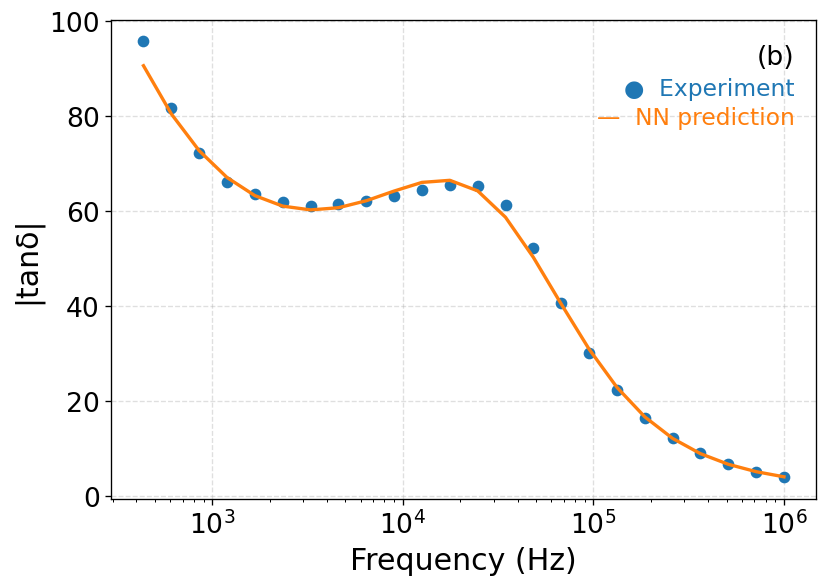

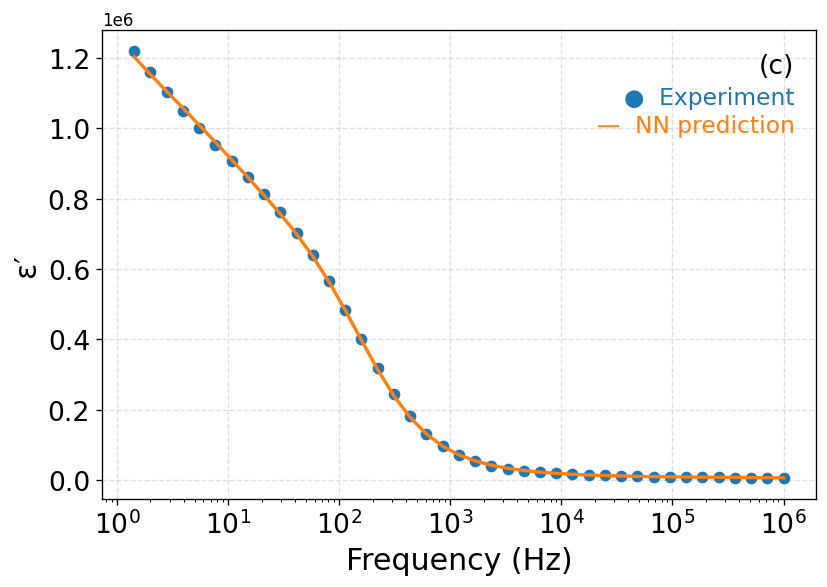

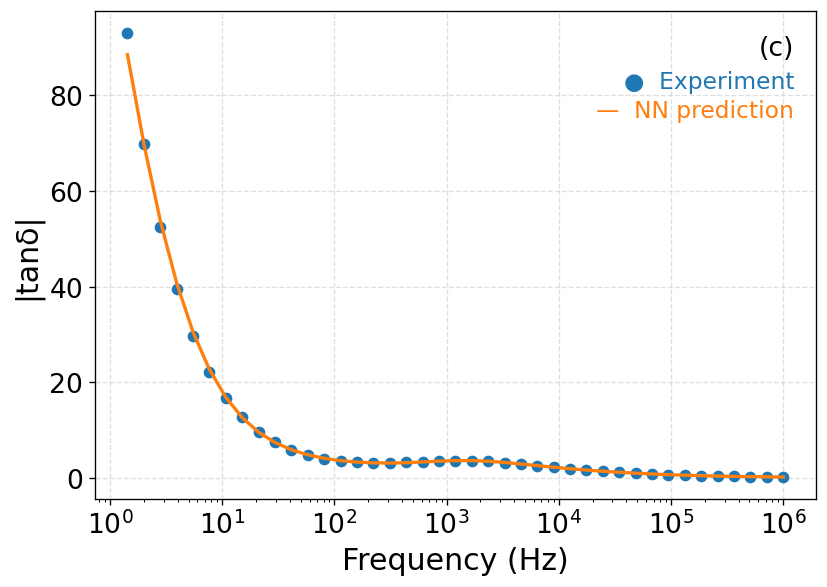

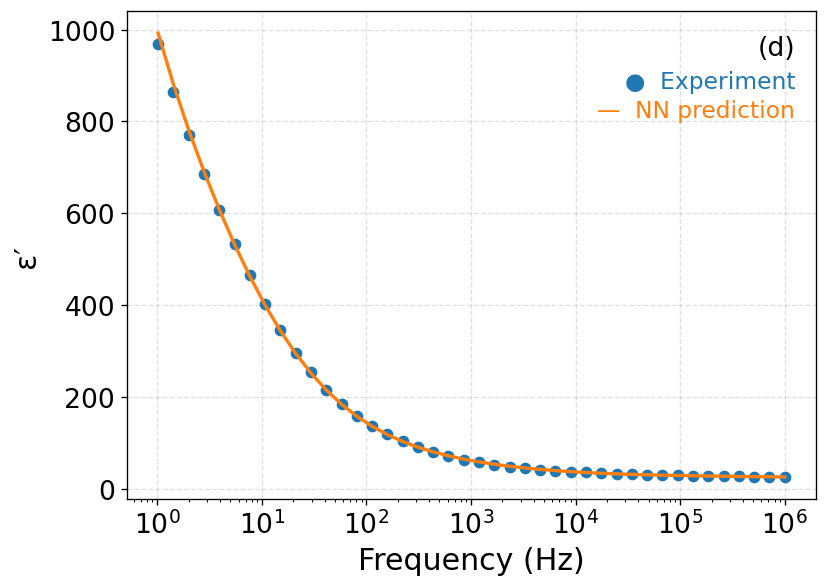

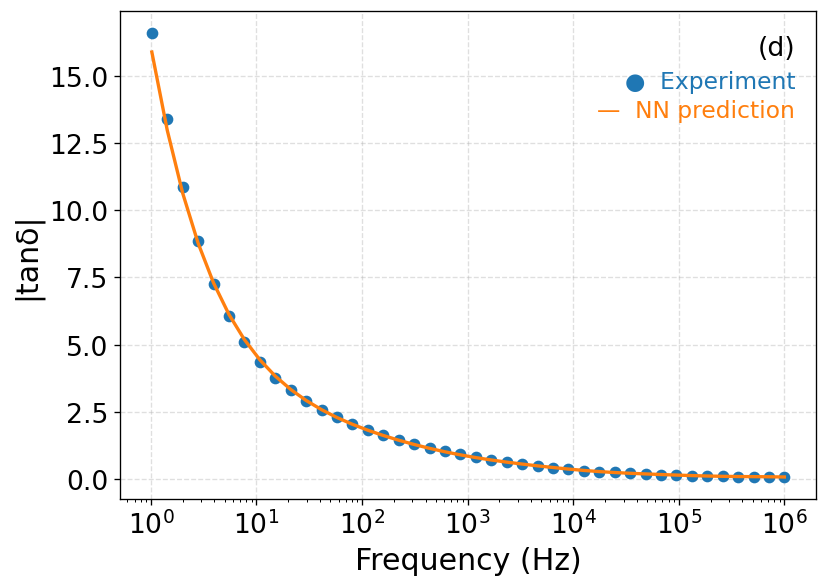

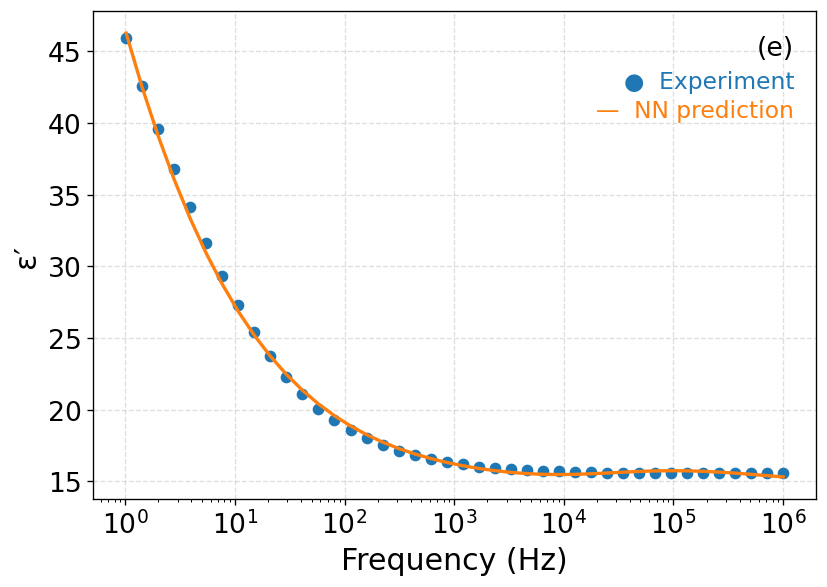

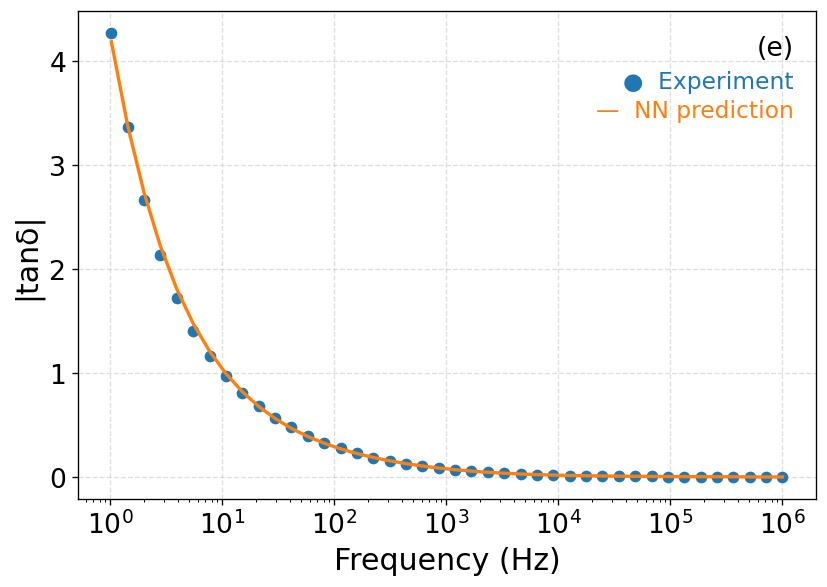

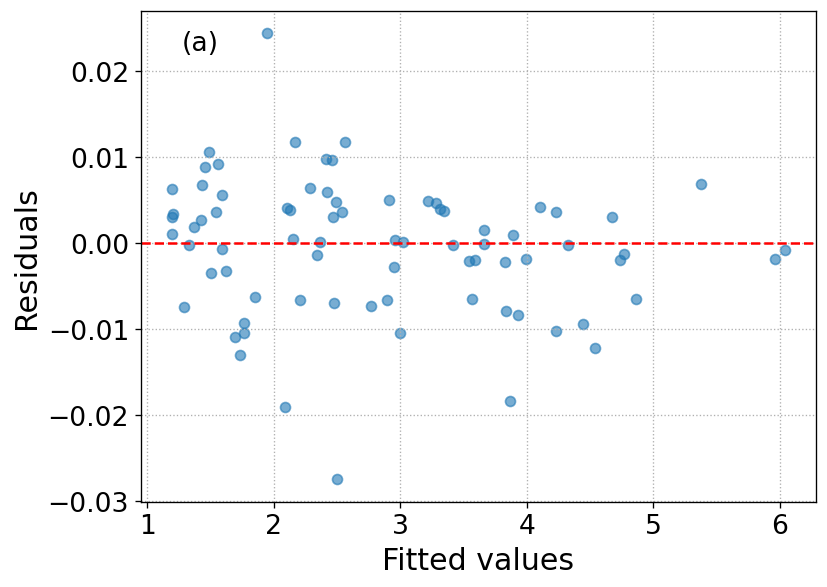

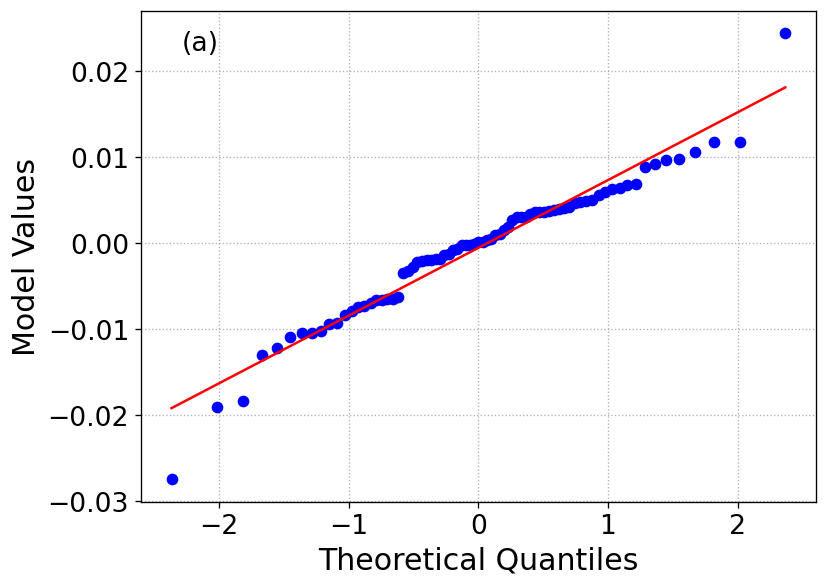

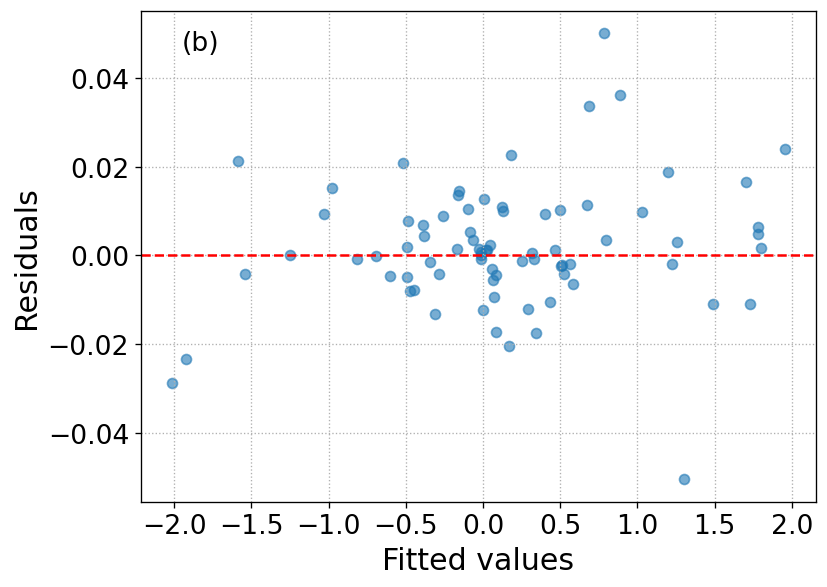

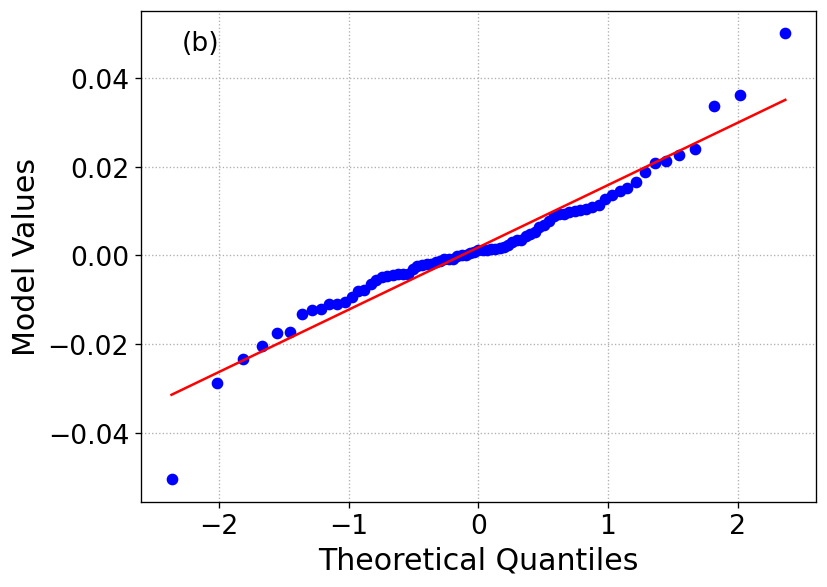

In [3]:
# better plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files as colab_files
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import scipy.stats as stats
import string

plt.rcParams["figure.dpi"] = 120

print("Upload 11 CSV files (1.csv ... 11.csv):")
uploaded = colab_files.upload()

def numeric_key(name):
    import re
    m = re.search(r"(\d+)", name)
    return int(m.group(1)) if m else 0

csv_names = sorted(uploaded.keys(), key=numeric_key)
print("Loaded:", csv_names)

condition_map = {
    1:(0.50, 950), 2:(0.75, 950), 3:(1.50, 950),
    4:(2.25, 950), 5:(3.00, 950),
    6:(0.00,1050), 7:(0.50,1050), 8:(0.75,1050),
    9:(1.50,1050), 10:(2.25,1050), 11:(3.00,1050),
}

per_condition = {}
freq_col = None

for idx, fname in enumerate(csv_names, start=1):
    v2o5, temp = condition_map[idx]
    if v2o5 == 0.0 and temp == 1050:
        continue

    df = pd.read_csv(fname, encoding="latin1")
    df.columns = [c.replace("\ufeff", "").strip() for c in df.columns]

    if freq_col is None:
        freq_col = df.columns[0]

    df = df[df[freq_col] != 1].copy()
    df["V2O5"] = v2o5
    df["Temp"] = temp
    df = df.apply(pd.to_numeric, errors="coerce")

    mask = (
        df[freq_col].notna() &
        df["Eps'"].notna() &
        df["Tan(Delta)"].notna() &
        (df["Eps'"] > 0) &
        (df["Tan(Delta)"].abs() < 100)
    )

    clean = df[mask].copy()
    clean.sort_values(freq_col, inplace=True)
    per_condition[(v2o5,temp)] = clean
tiny = 1e-10
X, y_eps, y_tan = [], [], []

for (v2o5, temp), df in per_condition.items():
    f = df[freq_col].values
    eps = df["Eps'"].values
    tan = np.abs(df["Tan(Delta)"].values)

    for fi, ei, ti in zip(np.log10(f), np.log10(eps), np.log10(tan + tiny)):
        X.append([fi, v2o5, (temp - 1000)/100])
        y_eps.append(ei)
        y_tan.append(ti)

X = np.array(X)
y_eps = np.array(y_eps)
y_tan = np.array(y_tan)

X_tr, X_te, y_eps_tr, y_eps_te, y_tan_tr, y_tan_te = train_test_split(
    X, y_eps, y_tan, test_size=0.2, random_state=0
)

NN_eps = MLPRegressor((32,16), activation="tanh",
                      solver="lbfgs", alpha=1e-3,
                      max_iter=8000, random_state=0)
NN_tan = MLPRegressor((32,16), activation="tanh",
                      solver="lbfgs", alpha=1e-3,
                      max_iter=8000, random_state=1)

NN_eps.fit(X_tr, y_eps_tr)
NN_tan.fit(X_tr, y_tan_tr)

def predict_eps_tan(f, v2o5, temp):
    Xp = np.column_stack([
        np.log10(f),
        np.full_like(f, v2o5),
        np.full_like(f, (temp - 1000)/100)
    ])
    return 10**NN_eps.predict(Xp), 10**NN_tan.predict(Xp)

def plot_by_temperature(target_temp):
    conds = sorted([(v,t) for (v,t) in per_condition if t == target_temp])
    labels = list(string.ascii_lowercase)

    for i,(v2o5,temp) in enumerate(conds):
        df = per_condition[(v2o5,temp)]
        f = df[freq_col].values
        eps_ml, tan_ml = predict_eps_tan(f, v2o5, temp)

        for y_exp, y_ml, ylabel in [
            (df["Eps'"].values, eps_ml, "ε′"),
            (np.abs(df["Tan(Delta)"].values), tan_ml, "|tanδ|")
        ]:
            fig, ax = plt.subplots(figsize=(7,5))

            ax.semilogx(f, y_exp, "o", ms=6)
            ax.semilogx(f, y_ml, "-", lw=2)

                   ax.text(0.97, 0.95, f"({labels[i]})",
                    ha="right", va="top",
                    transform=ax.transAxes, fontsize=16)

                  ax.text(0.97, 0.88, "●  Experiment",
                    ha="right", va="top",
                    transform=ax.transAxes,
                    fontsize=14, color="tab:blue")

            ax.text(0.97, 0.82, "—  NN prediction",
                    ha="right", va="top",
                    transform=ax.transAxes,
                    fontsize=14, color="tab:orange")

            ax.set_xlabel("Frequency (Hz)", fontsize=18)
            ax.set_ylabel(ylabel, fontsize=18)
            ax.tick_params(labelsize=16)
            ax.grid(True, which="major", ls="--", alpha=0.4)
            ax.grid(False, which="minor")

            plt.tight_layout()
            plt.show()

print("=== 950°C ===")
plot_by_temperature(950)

print("=== 1050°C ===")
plot_by_temperature(1050)

def plot_test_residuals(y_true, y_pred, panel):
    res = y_true - y_pred
    plt.figure(figsize=(7,5))
    plt.scatter(y_pred, res, alpha=0.6)
    plt.axhline(0, color="red", linestyle="--")

    plt.text(
        0.06, 0.92, f"({panel})",
        transform=plt.gca().transAxes,
        fontsize=16
    )

    plt.xlabel("Fitted values", fontsize=18)
    plt.ylabel("Residuals", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, ls=":")
    plt.tight_layout()
    plt.show()

def qq_plot(residuals, panel):
    plt.figure(figsize=(7,5))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("")

    plt.text(
        0.06, 0.92, f"({panel})",
        transform=plt.gca().transAxes,
        fontsize=16
    )

    plt.xlabel("Theoretical Quantiles", fontsize=18)
    plt.ylabel("Model Values", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, ls=":")
    plt.tight_layout()
    plt.show()

y_eps_pred = NN_eps.predict(X_te)
plot_test_residuals(y_eps_te, y_eps_pred, panel="a")
qq_plot(y_eps_te - y_eps_pred, panel="a")

y_tan_pred = NN_tan.predict(X_te)
plot_test_residuals(y_tan_te, y_tan_pred, panel="b")
qq_plot(y_tan_te - y_tan_pred, panel="b")



In [6]:
from PIL import Image
import matplotlib.pyplot as plt
DPI = 600
FIG_WIDTH_IN = 7.0
FIG_HEIGHT_IN = 3.2

print("Upload ")
from google.colab import files
uploaded = files.upload()

imgs = list(uploaded.keys())
assert len(imgs) == 2, "Upload exactly TWO images"

img1 = Image.open(imgs[0]).convert("RGB")
img2 = Image.open(imgs[1]).convert("RGB")
fig, axes = plt.subplots(
    1, 2,
    figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN),
    dpi=DPI
)

axes[0].imshow(img1)
axes[1].imshow(img2)

for ax in axes:
    ax.axis("off")

plt.tight_layout(pad=0.05)
png_name = "qq_residuals_composite_clean.png"
pdf_name = "qq_residuals_composite_clean.pdf"

plt.savefig(png_name, dpi=DPI, bbox_inches="tight")
plt.savefig(pdf_name, bbox_inches="tight")
plt.close()

print("Saved files:")
print(" -", png_name)
print(" -", pdf_name)

# =========================
# DOWNLOAD
# =========================
files.download(png_name)
files.download(pdf_name)


Upload the TWO QQ plot images


Saving residual.png to residual.png
Saving residual2.png to residual2.png
Saved files:
 - qq_residuals_composite_clean.png
 - qq_residuals_composite_clean.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>